In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import save_model

2023-11-09 01:02:15.275508: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-09 01:02:15.299730: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 01:02:15.299764: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 01:02:15.299791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 01:02:15.305655: I tensorflow/core/platform/cpu_feature_g

In [2]:
images = []
ages = []

for image in os.listdir('../data/UTKFace_resized_childfree_96'):
    split = image.split('_')
    if len(split) != 4:
        print(image)
        print(split)
        continue

    ages.append(int(split[0]))  
    images.append(Image.open('../data/UTKFace_resized_childfree_96/' + image))

61_1_20170109142408075.jpg.chip.jpg
['61', '1', '20170109142408075.jpg.chip.jpg']


In [3]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
df = pd.concat([images, ages], axis=1)

In [4]:
df.head(10)

,Images,Ages
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,62
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,52
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,35
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,50
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,55
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,40
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,54
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,75
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,44
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,26


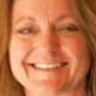

52


In [5]:
display(df['Images'][1])
print(df['Ages'][1])

/tmp/ipykernel_6272/1962184007.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'], bins=72)


<Axes: xlabel='Ages', ylabel='Density'>

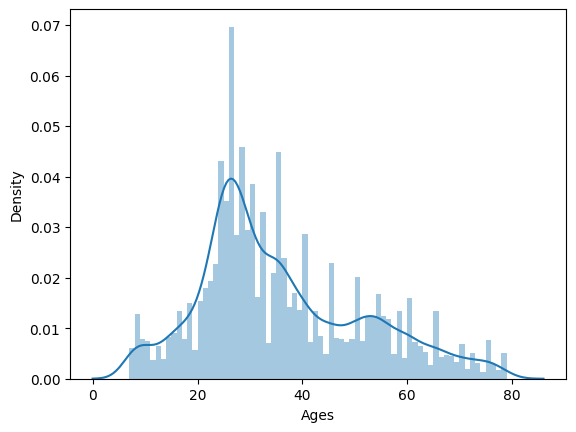

In [6]:
sns.distplot(df['Ages'], bins=72)

In [7]:
df['Ages'].value_counts()

Ages
26    956
28    629
35    617
24    592
30    529
     ... 
64     37
71     27
77     24
74     17
79     17
Name: count, Length: 73, dtype: int64

In [8]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    age = [int(df['Ages'].iloc[i])]
    y.append(age)
x = np.array(x)

/tmp/ipykernel_6272/3251556199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
/tmp/ipykernel_6272/3251556199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
/tmp/ipykernel_6272/3251556199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Images'].iloc[i] = df['Images'].iloc[i].resize((96,96))
/tmp/ipyke

In [9]:
df.head(10)

,Images,Ages
0,<PIL.Image.Image image mode=RGB size=96x96 at ...,62
1,<PIL.Image.Image image mode=RGB size=96x96 at ...,52
2,<PIL.Image.Image image mode=RGB size=96x96 at ...,35
3,<PIL.Image.Image image mode=RGB size=96x96 at ...,50
4,<PIL.Image.Image image mode=RGB size=96x96 at ...,55
5,<PIL.Image.Image image mode=RGB size=96x96 at ...,40
6,<PIL.Image.Image image mode=RGB size=96x96 at ...,54
7,<PIL.Image.Image image mode=RGB size=96x96 at ...,75
8,<PIL.Image.Image image mode=RGB size=96x96 at ...,44
9,<PIL.Image.Image image mode=RGB size=96x96 at ...,26


In [10]:
y_age = df['Ages']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)

In [11]:
age_model = Sequential()
age_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(96, 96, 3)))
age_model.add(MaxPooling2D((2,2)))
age_model.add(Conv2D(64, (3,3), activation='relu'))
age_model.add(MaxPooling2D((2,2)))
age_model.add(Conv2D(128, (3,3), activation='relu'))
age_model.add(MaxPooling2D((2,2)))
age_model.add(Flatten())
age_model.add(Dense(64, activation='relu'))
age_model.add(Dropout(0.5))
age_model.add(Dense(1, activation='relu'))
age_model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.0001))

2023-11-09 01:02:23.041379: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 01:02:23.045730: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-09 01:02:23.045913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
datagen = ImageDataGenerator(rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train1 = datagen.flow(x_train_age, y_train_age, batch_size=64)

In [15]:
test1 = test_datagen.flow(x_test_age, y_test_age, batch_size=64)

In [16]:
history1 = age_model.fit(train1, epochs=20, shuffle=True, validation_data=test1, verbose=1)

Epoch 1/20


2023-11-09 01:02:24.008735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-09 01:02:24.248983: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 01:02:24.524382: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 01:02:25.116247: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x560309a97ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-09 01:02:25.116269: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-11-09 01:02:25.119173: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-09 01:02:25.168470: I ./tensorflow/compiler/jit/

172/172 [==============================] - 12s 57ms/step - loss: 482.2724 - val_loss: 269.1691
Epoch 2/20
172/172 [==============================] - 9s 54ms/step - loss: 317.0842 - val_loss: 267.0999
Epoch 3/20
172/172 [==============================] - 9s 54ms/step - loss: 304.6330 - val_loss: 242.8869
Epoch 4/20
172/172 [==============================] - 9s 55ms/step - loss: 283.8142 - val_loss: 219.6785
Epoch 5/20
172/172 [==============================] - 9s 55ms/step - loss: 271.1529 - val_loss: 209.2619
Epoch 6/20
172/172 [==============================] - 9s 54ms/step - loss: 260.1149 - val_loss: 207.9382
Epoch 7/20
172/172 [==============================] - 9s 55ms/step - loss: 251.2930 - val_loss: 202.0414
Epoch 8/20
172/172 [==============================] - 9s 54ms/step - loss: 244.3494 - val_loss: 208.8571
Epoch 9/20
172/172 [==============================] - 9s 53ms/step - loss: 238.0532 - val_loss: 183.1495
Epoch 10/20
172/172 [==============================] - 10s 55ms/s

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(age_model.predict(test1), y_test_age)

43/43 [==============================] - 0s 5ms/step


325.7139876449224

In [18]:
save_model(age_model, '../../models/model_age.model')
age_model.save_weights('../../models/weights_age.h5')

INFO:tensorflow:Assets written to: ../../models/model_age.model/assets


INFO:tensorflow:Assets written to: ../../models/model_age.model/assets


In [19]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((96,96))
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((96,96))
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((96,96))
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 96, 96, 3)
    
    age = int(age_model.predict(ar))

    print('Age:', age)
    return im.resize((96,96))

1/1 [==============================] - 0s 102ms/step
Age: 49


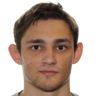

In [20]:
process_and_predict('/home/vorkov/Documents/photo_2023-10-15_15-31-15.jpg')